In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy import special

In [123]:
func1 = lambda dseta : np.sqrt(2/np.pi)*np.exp(-dseta**2/2)/dseta+special.erf(dseta/np.sqrt(2))-(1-c)**-1

In [124]:
func2 = lambda dseta2 : np.sqrt(2/np.pi)*np.exp(-dseta2**2/2)/dseta2+special.erf(dseta2/np.sqrt(2))-x

In [ ]:
c = np.linspace(0.1,0.9,100)
x = np.linspace(0.1,5,200)

In [ ]:
fig, ax = plt.subplots()
ax.plot(c, func1(c), '-', label = 'func(c)')
ax.plot(x, func2(x), '-', label = r'func( (1+$rho$)/(1-c) )')
ax.set_xlabel(r'$c$')
ax.set_ylabel(r'$func$')
ax.legend(loc=0)

In [125]:
alpha_c = []
ces = [0.001*i for i in range(990)]
for c in ces:
    dseta_guess = 0.5
    dseta = fsolve(func1, dseta_guess)
    alpha_c.append(special.erf(dseta[0]/np.sqrt(2)))
    if c == 0.5:
        print(special.erf(dseta/np.sqrt(2)))

[0.33740019]


In [129]:
alpha_rho = []
exis = np.linspace(1,5,100)
for x in exis:
    dseta_guess = 0.5
    dseta2 = fsolve(func2, dseta_guess)
    alpha_rho.append(special.erf(dseta2/np.sqrt(2)))
    if x == 0.5:
        print(special.erf(dseta2/np.sqrt(2)))

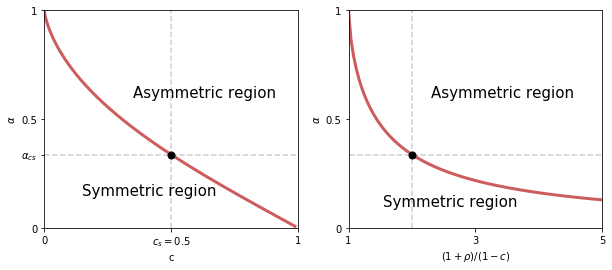

In [362]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].tick_params(which='both',
                  labelbottom=True,
                  labeltop=False,
                  labelleft=True,
                  labelright=False,
                  bottom=True,
                  top=False,
                  left=True,
                  right=False)
ax[1].tick_params(which='both',
                  labelbottom=True,
                  labeltop=False,
                  labelleft=True,
                  labelright=False,
                  bottom=True,
                  top=False,
                  left=True,
                  right=False)


ax[0].set(xlabel='c', ylabel=r'$\alpha$', xlim=[0,1], ylim=[0,1])
ax[0].set_yticks([0, 0.337, 0.5, 1])
ax[0].set_yticklabels(['0', r'$\alpha_{cs}$', '0.5', '1'])
ax[0].set_xticks([0, 0.5, 1])
ax[0].set_xticklabels(['0', r'$c_s=0.5$', '1'])

ax[0].axvline(x=0.5, color='k', alpha=0.2, linestyle='--')
ax[0].axhline(y=0.337, color='k', alpha=0.2, linestyle='--')
ax[0].plot(ces, alpha_c, zorder=-1,ls ='-', color= 'indianred',lw=3)
ax[0].plot(0.5,0.337, zorder=1, marker='o',ms=7, mec='k', mfc='k')
ax[0].text(x=0.15,y=0.15,s='Symmetric region', fontsize=15)
ax[0].text(x=0.35,y=0.6,s='Asymmetric region', fontsize=15)

ax[1].set(xlabel=r'$(1+\rho)/(1-c)$', ylabel=r'$\alpha$', xlim=[1,5], ylim=[0,1])
ax[1].set_yticks([0, 0.5, 1])
ax[1].set_yticklabels(['0', '0.5', '1'])
ax[1].set_xticks([1, 3, 5])
ax[1].set_xticklabels(['1', '3', '5'])

ax[1].axvline(x=2, color='k', alpha=0.2, linestyle='--')
ax[1].axhline(y=0.337, color='k', alpha=0.2, linestyle='--')
ax[1].plot(np.array(exis), alpha_rho, zorder=-1,ls ='-', color= 'indianred',lw=3)
ax[1].plot(2,0.337, zorder=1, marker='o',ms=7, mec='k', mfc='k')
ax[1].text(x=1.55,y=0.1,s='Symmetric region', fontsize=15)
ax[1].text(x=2.3,y=0.6,s='Asymmetric region', fontsize=15)

filename = 'phase_diagram_alpha_c_rho.png'
#fig.savefig(filename, bbox_inches='tight')

## - New trial from 18-aug forward for Np Ns transition line

### See variation of $\alpha$ if we vary Np (alpha_Np) or Ns (alpha_Ns)

In [61]:
func3 = lambda dseta3, Np : (np.sqrt(2/np.pi)*np.exp(-dseta3**2/2)/dseta3+special.erf(dseta3/np.sqrt(2))-(1+Np))
alpha_Ns = []
Nprods = np.linspace(0.000001,10,1000)
for Np in Nprods:
    dseta_guess = 0.5
    dseta3 = fsolve(func3, dseta_guess, args=(Np))
    alpha_Np.append(special.erf(dseta3[0]/np.sqrt(2)))

In [3]:
alpha_Np = np.array(alpha_Np)
alpha_Np[:10]

array([0.99998005, 0.94857944, 0.91524673, 0.88791374, 0.86422567,
       0.84310819, 0.82394825, 0.80635164, 0.7900449 , 0.77482804])

In [52]:
func4 = lambda dseta4, rho : (np.sqrt(2/np.pi)*np.exp(-dseta4**2/2)/dseta4+special.erf(
                                    dseta4/np.sqrt(2))-(1+rho))
cuantos = 1000
alpha_rho = np.zeros(cuantos)
rhos = np.linspace(0.000001,6,cuantos)
i = -1
for rho in rhos:
    i += 1
    dseta_guess = 0.5
    dseta4 = fsolve(func4, dseta_guess, args=(rho))
    alpha_rho[i] = special.erf(dseta4[0]/np.sqrt(2))

In [58]:
1/alpha_rho[:10]

array([1.00001995, 1.03632347, 1.06245788, 1.08540684, 1.10647266,
       1.12623552, 1.14502047, 1.16303338, 1.18041523, 1.197268  ])

In [57]:
1/rhos[:10]

array([1.00000000e+06, 1.66472310e+02, 8.32430839e+01, 5.54969292e+01,
       4.16232744e+01, 3.32988967e+01, 2.77492346e+01, 2.37851525e+01,
       2.08120703e+01, 1.84996608e+01])

In [ ]:
rhos[1]-rhos[0]

In [63]:
func4 = lambda dseta4, Ns : (np.sqrt(2/np.pi)*np.exp(-dseta4**2/2)/dseta4+special.erf(dseta4/np.sqrt(2))-(1+1/Ns))
alpha_Ns = []
Nspecs = np.linspace(1.000001,10,1000)
for Ns in Nspecs:
    dseta_guess = 0.5
    dseta4 = fsolve(func4, dseta_guess, args=(Ns))
    alpha_Ns.append(special.erf(dseta4[0]/np.sqrt(2)))

In [64]:
alpha_Ns = np.array(alpha_Ns)
alpha_Ns[:10]
alphaNs = alpha_Ns[::-1]

In [65]:
alphaNs = alphaNs/alphaNs[0]

### Increments for alpha_Np and alpha_Ns

In [220]:
increm_alpha_Np = alpha_Np[:-1]-alpha_Np[1:]

In [221]:
increm_alpha_Np[:10]

array([0.05140061, 0.03333271, 0.02733299, 0.02368807, 0.02111749,
       0.01915994, 0.01759661, 0.01630674, 0.01521686, 0.01427906])

In [222]:
increm_alpha_Ns = alpha_Ns[1:]-alpha_Ns[:-1]

In [223]:
increm_alpha_Ns[:10]

array([0.00170901, 0.00169684, 0.00168482, 0.00167295, 0.00166122,
       0.00164963, 0.00163818, 0.00162687, 0.00161568, 0.00160463])

### Total lenght of the increment vectors

In [224]:
len(increm_alpha_Ns), len(increm_alpha_Np)

(999, 999)

### When alpha_Ns changes slower than alpha_Np:  the first 259

In [225]:
len(increm_alpha_Ns[increm_alpha_Ns < increm_alpha_Np])

259

### When alpha_Np changes faster than alpha_Np:  the last 740

In [226]:
len(increm_alpha_Ns[increm_alpha_Ns > increm_alpha_Np])

740

### How much I have to increase Ns for compensate the increase in alfa induced by the increase of Np?

In [117]:
increm = Nspecs[100]-Nspecs[99]
NS = [1]
NP = [0]
for i in range(len(Nspecs)-1):
    if i > 0:
        NS.append(NS[-1]+inc_np*inc_mul_s/inc_mul_p)

In [155]:
#alpha_Ns

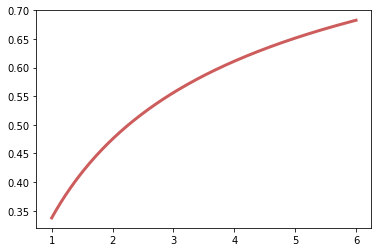

In [135]:
fig,ax=plt.subplots()
ax.plot(Nspecs, alpha_Ns, ls ='-', color= 'indianred', lw=3)

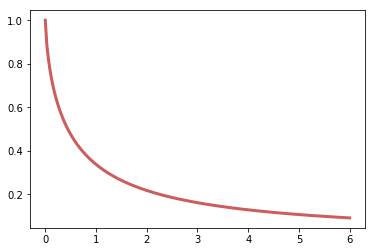

In [134]:
fig,ax=plt.subplots()
ax.plot(Nprods, alpha_Np, ls ='-', color= 'indianred', lw=3)

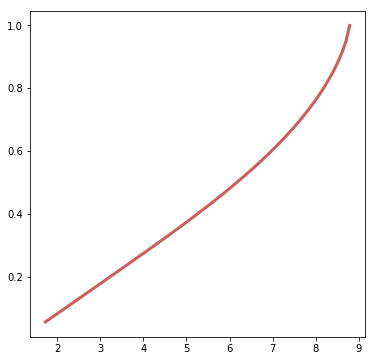

In [67]:
fig, ax = plt.subplots(figsize=(6,6))

ax.tick_params(which='both',
                  labelbottom=True,
                  labeltop=False,
                  labelleft=True,
                  labelright=False,
                  bottom=True,
                  top=False,
                  left=True,
                  right=False)
ax.tick_params(which='both',
                  labelbottom=True,
                  labeltop=False,
                  labelleft=True,
                  labelright=False,
                  bottom=True,
                  top=False,
                  left=True,
                  right=False)


#ax.set(xlabel=r'$N_{prods}/2^M$', ylabel=r'$N_{spec}/2^M$', xlim=[0,6], ylim=[0,4])

#ax.axvline(x=0.5, color='k', alpha=0.2, linestyle='--')
#ax.axhline(y=0.337, color='k', alpha=0.2, linestyle='--')
ax.plot(1/alpha_Ns**2, alpha_Np, zorder=-1,ls ='-', color= 'indianred',lw=3)
#ax.plot(0.5,0.337, zorder=1, marker='o',ms=7, mec='k', mfc='k')
#ax.text(x=0.15,y=0.15,s='Symmetric region', fontsize=15)
#ax.text(x=0.35,y=0.6,s='Asymmetric region', fontsize=15)